<a href="https://colab.research.google.com/github/RakeshKulungRai/Learning_Tensorflow/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to neural network classiication with Tensorflow
 In this notebook we're going to learn how to write neural networks for classification problems.

 A classification is where you try to classify something as one thing or another.
* Binary classification
* Mutliclass classification
* Multiable classification

##  Creting data to view and fit



In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples =1000

#Create circles
x,y = make_circles(n_samples,
                   noise =0.03,
                   random_state=42)

In [ ]:
# Check out the features
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now .... let's visualize |||

In [ ]:
import pandas as pd
circles = pd.DataFrame({"{x0}":x[:,0], "x1":x[:,1], "label":y})
circles

,{x0},x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [ ]:
x[1]

array([-0.75615888,  0.15325888])

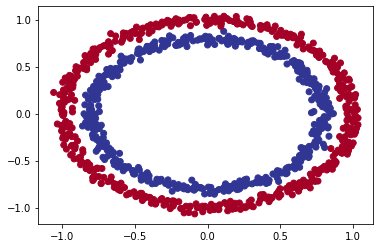

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu)

## Input and output shpes

In [ ]:
# Check teh shapes of our features and labels
x.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# how maney samples we're working
len(x), len(y)

(1000, 1000)

In [ ]:
# View the first example of features and labels
x[0],y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

 ## Steps in modelling

The steps in modelling with TensorFlow are typically::
1. Create or import model
2. Compiler the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate..

In [ ]:
import tensorflow as tf
tf.__version__

'2.11.0'

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
#3. Fit the model
model_1.fit(x,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 5.0724 - accuracy: 0.4720
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 4.9002 - accuracy: 0.4700
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 3.4430 - accuracy: 0.4880
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.8048 - accuracy: 0.4920
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7182 - accuracy: 0.4960


In [ ]:
model_1.fit(x,y,epochs=200,verbose=0)
model_1.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification problem and our model is getting around _50% accuracy...it's performing as if it's guessing
So let''s step things up a notch and add an extra layer.

In [ ]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
model_2.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.SGD(),
                metrics =["accuracy"])
model_2.fit(x, y,epochs=200,verbose=0)



In [ ]:
model_2.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6947 - accuracy: 0.5000


[0.6947028040885925, 0.5]

In [ ]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

##Improving our model
let's look into our bag of triks to see how we can improve our model.
1. Create a model  :- we might to add more layers or increase the number of hidden units within a layer
2. Compiling a model :- here we might to choose a different optimization function such as Adam instead of SGD
3. Fitting model :- perhaps  we might fit our model for more epochs

In [ ]:
# set the rando, seed
tf.random.set_seed(42)
# 1.
model_3= tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# 2.
model_3.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#3. 
model_3.fit(x, y, epochs=100, verbose=0)

In [ ]:
model_3.evaluate(x,y)


32/32 [==============================] - 0s 1ms/step - loss: 0.6974 - accuracy: 0.5050


[0.697358250617981, 0.5049999952316284]

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


To visualize our model's predictions, let's create a funtion `plot_decision_boundry()`, this funtion will:

* Take in a trained model, features (X) and labels (y)
* Create a  meshgrid of the different x values 
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (wher each uniue class falls)

In [ ]:
import numpy as np

In [ ]:
def plot_decision_boundary(model, x, y):
  """"
  Plots the decision boundary created by a model prediction on X.
  1. made with ml
  2. cs231n cnn
   """
   # Define the axis bounderies of the plot and created a meshgrid
  x_min, x_max =x[:,0].min() - 0.1, x[:,0].max() +0.1
  y_min, y_max = x[:,1].min() -0.1, x[:,1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max,100),
                       np.linspace(y_min,y_max,100))
  
  # Create x value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(),yy.ravel()] # stack 2D array together

  # Make predictions
  y_pred = model.predict(x_in)

  # check for multi class
  if len(y_pred[0]) >1:
    print("doing muliclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
     print("doing binary classification")
     y_pred = np.round(y_pred).reshape(xx.shape)
  #Plot the decision boundary
  plt.contourf(xx, yy,y_pred, cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(x[:,0],x[:,1],c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(),yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classification


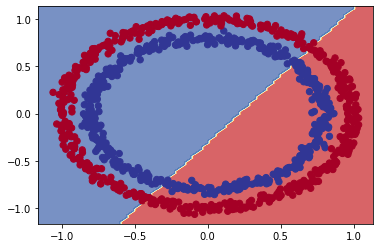

In [ ]:
plot_decision_boundary(model_3,x,y)

In [ ]:
# Let's see if our model can be used for a regression problem...
tf.random.set_seed(42)

# Create some regression data
x_regression = tf.range(0,1000,5)
y_regression = tf.range(100, 1100,5) # y =x +100


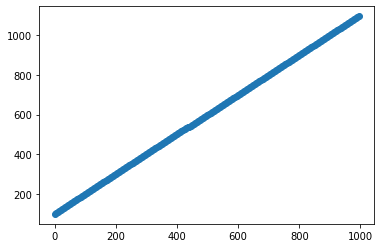

In [ ]:
plt.scatter(x_regression,y_regression)

In [ ]:
x_reg_train = x_regression[:150]
y_reg_train = y_regression[:150]
x_reg_test = x_regression[150:]
y_reg_test = y_regression[150:]

#Fit our model to the regression data
# model_3.fit(x_reg_train, y_reg_train, epochs=100)

We compile our model for a binary classification problem so it saying error


In [ ]:
# Setup random seed
tf.random.set_seed(42)

#1.
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["mae"])


In [ ]:
model_3.fit(tf.expand_dims(x_reg_train,axis=-1),y_reg_train, epochs=200,verbose=0)

2/2 [==============================] - 0s 9ms/step


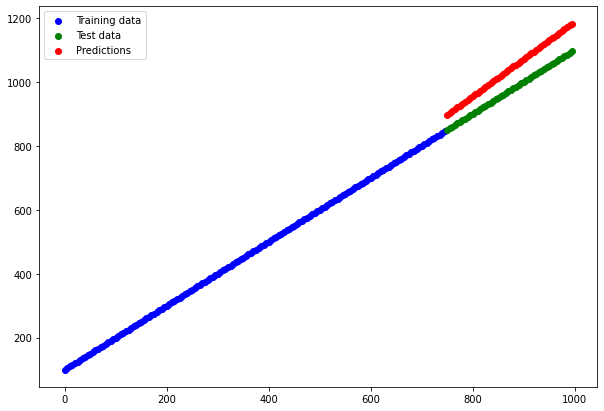

In [ ]:
# Make prediction with our trained model
y_reg_preds = model_3.predict(x_reg_test)
# Plot the model's predictions against the 
plt.figure(figsize=(10,7))
plt.scatter(x_reg_train,y_reg_train,c="b",label ="Training data")
plt.scatter(x_reg_test,y_reg_test, c="g", label="Test data")
plt.scatter(x_reg_test,y_reg_preds, c="r", label ="Predictions")
plt.legend()

## The missing piece: Non Linearity

In [ ]:
tf.random.set_seed(42)
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])
history = model_4.fit(x,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.5499 - accuracy: 0.4810
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4905 - accuracy: 0.4810
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4322 - accuracy: 0.4810
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3929 - accuracy: 0.4780
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3396 - accuracy: 0.4760
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3218 - accuracy: 0.4770
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3063 - accuracy: 0.4770
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1619 - accuracy: 0.4760
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.0042 - accuracy: 0.4770
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.7980 - accuracy: 0.4760
Epoch 11/

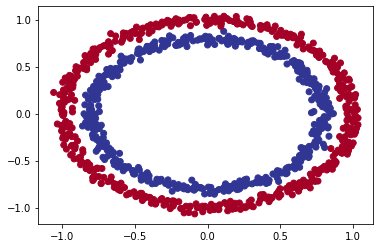

In [ ]:
# Check out our data
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu)

313/313 [==============================] - 1s 2ms/step
doing binary classification


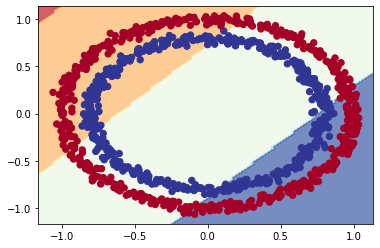

In [ ]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,
                       x=x,
                       y=y)

In [ ]:
history

Let's try build our first neural network using non linear activation function

In [ ]:
# SET  random seed
tf.random.set_seed(42)
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu)
])
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])
history= model_5.fit(x,y, epochs=1000, verbose=0)

313/313 [==============================] - 0s 1ms/step
doing binary classification


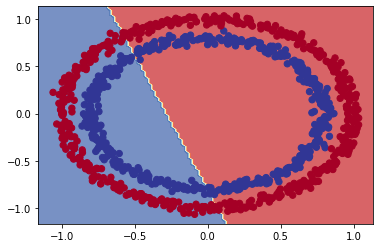

In [ ]:
plot_decision_boundary(model_5,
                       x=x,
                       y=y)

In [ ]:
# Time ot replicate the multi-layer neural network 
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation ="relu"),
    tf.keras.layers.Dense(4, activation ="relu"),
    tf.keras.layers.Dense(1)
])
model_6.compile(loss="binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])
history = model_6.fit(x,y,epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 3ms/step - loss: 1.1459 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 0.9326 - accuracy: 0.4950
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 0.8437 - accuracy: 0.4510
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 0.8038 - accuracy: 0.3880
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7834 - accuracy: 0.3870
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7719 - accuracy: 0.4160
Epoch 7/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7650 - accuracy: 0.4210
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7604 - accuracy: 0.4220
Epoch 9/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7564 - accuracy: 0.4080
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7534 - accuracy: 0.3980
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classification


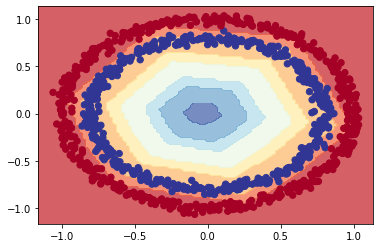

In [ ]:
plot_decision_boundary(model_6,x,y)

In [ ]:
tf.random.set_seed(42)
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model_7.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
model_7.fit(x,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6914 - accuracy: 0.4980
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5050
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.5100
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5190
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.5290
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5340
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5280
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.5250
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5250
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.5250
Epoch 11/

In [ ]:
model_7.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2185 - accuracy: 0.9900


[0.2185281217098236, 0.9900000095367432]

313/313 [==============================] - 0s 1ms/step
doing binary classification


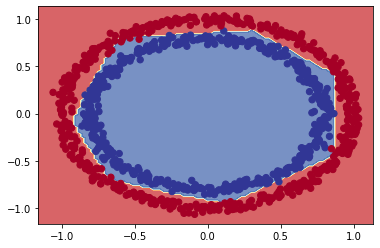

In [ ]:
plot_decision_boundary(model_7,x,y)

**Note:** The combination of **linear (straight lines ) and non-linera (non-straight lines) functions** is one of the key fundamentals of neural networks

Now we've discussed the concept of linear and non-linear functons (or lines) let's see them in action

In [ ]:
# Create a toy a tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

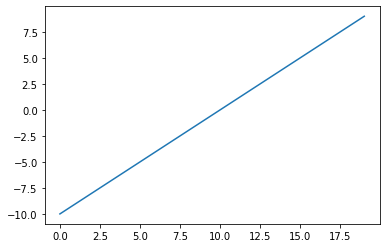

In [ ]:
plt.plot(A)

In [ ]:
# Let's start by replication sigmoid - sigmoid(x) = 1 / (1 + exp(-x)
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

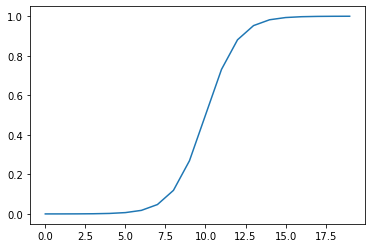

In [ ]:
plt.plot(sigmoid(A))

In [ ]:
 def relu(x):
   return tf.maximum(0, x)

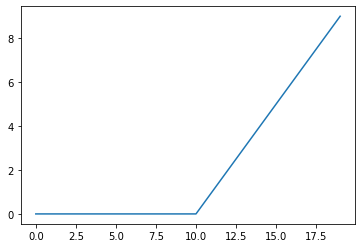

In [ ]:
plt.plot(relu(A))

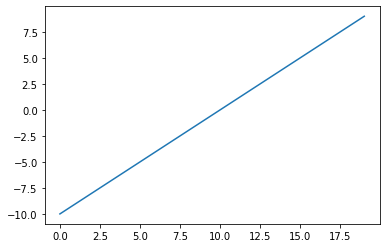

In [ ]:
plt.plot(tf.keras.activations.linear(A)) # all the elements are the same

In [ ]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

 ## Evaluating and improving our classification
  
  So far we've been training and testing on the same datase...
  However, in mahine learning this is basically a sin.
  So let's create a training set
  

In [ ]:
x_train, y_train = x[:800],y[:800]
x_test, y_test = x [800:], y[800:]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [ ]:
x_test

array([[ 6.19725230e-01,  5.06557203e-01],
       [ 6.47077518e-01, -3.64208423e-01],
       [ 4.18714630e-01,  6.84282939e-01],
       [-6.56306805e-01, -4.35764494e-01],
       [ 4.73864310e-01,  8.21235342e-01],
       [-9.85049067e-01,  1.18959505e-01],
       [-6.67864722e-01,  4.81669594e-01],
       [-4.13239724e-01,  9.27643150e-01],
       [ 7.64005728e-01,  1.88843685e-01],
       [ 8.88928919e-01,  4.32518065e-01],
       [ 7.26291194e-01,  3.66873841e-01],
       [-4.70197299e-01,  7.87493733e-01],
       [-3.02040508e-01,  7.44972146e-01],
       [ 1.43882577e-01, -8.22794070e-01],
       [-1.65980756e-01, -7.68488677e-01],
       [-2.74275495e-01, -7.41031770e-01],
       [ 5.97240716e-01, -5.66165658e-01],
       [-8.03313695e-01,  1.74317325e-01],
       [ 3.73006885e-01,  9.31017857e-01],
       [ 5.78581224e-01,  5.51794160e-01],
       [-9.91314270e-01,  1.42496017e-01],
       [-7.98507508e-01,  4.29896540e-02],
       [ 4.49479335e-01,  6.66179158e-01],
       [-5.

In [ ]:
tf.random.set_seed(42)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation ="relu"),
    tf.keras.layers.Dense(4, activation ="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics =["accuracy"])
history = model_8.fit(x_train,y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6918 - accuracy: 0.4900
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.4963
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5063
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5075
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.5100
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5200
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5200
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5163
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.5238
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5263
Epoch 11/25
25/25 [

In [ ]:
model_8.evaluate(x_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6739 - accuracy: 0.6050


[0.6738511919975281, 0.6050000190734863]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


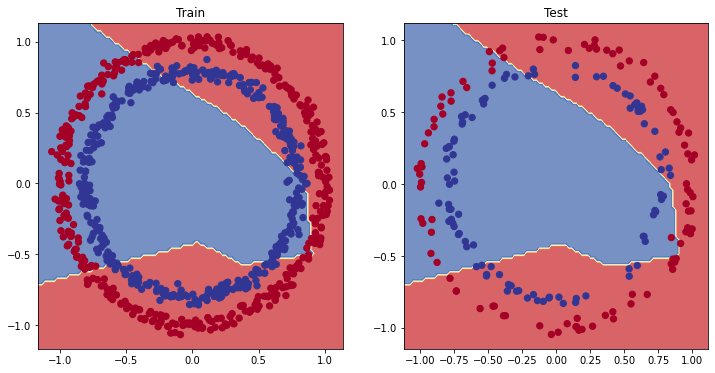

In [ ]:
# Plot the dicison boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8,
                       x=x_train,
                       y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8,
                       x=x_test,
                       y=y_test)

In [ ]:
model_8.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 4)                 12        
                                                                 
 dense_18 (Dense)            (None, 4)                 20        
                                                                 
 dense_19 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


## Plot the loss( or traininig )curves


In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.691817,0.49000
1,0.690635,0.49625
2,0.689896,0.50625
3,0.689460,0.50750
4,0.689142,0.51000
5,0.688759,0.52000
6,0.688233,0.52000
7,0.688008,0.51625
8,0.687628,0.52375
9,0.687190,0.52625


Text(0.5, 1.0, 'Model_8 loss curves')

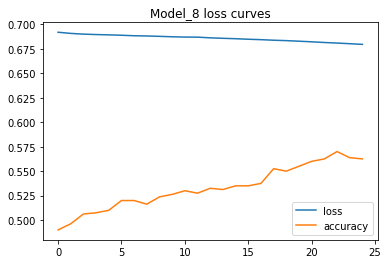

In [ ]:
# Plot the loss ucrves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

**Note:** For maney problem loss function is going to down means model is improving

## Finding the best learning rate
To find the ideal learning rate(teh learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of funcationality, you can add to your *whilw* its training.
* Another model ( we could use the same one as above, but we're  practing building models here)
* A modified loss curves plot :

In [ ]:
tf.random.set_seed(42)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model_9.compile(loss="binary_crossentropy",
                optimizer= "Adam",
                metrics=["accuracy"])
#Creat learning rate callback
lr_sheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_sheduler callback)
history_9 = model_9.fit(x_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_sheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6883 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.5025 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.5063 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.5038 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5125 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.5188 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.5138 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.5188 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

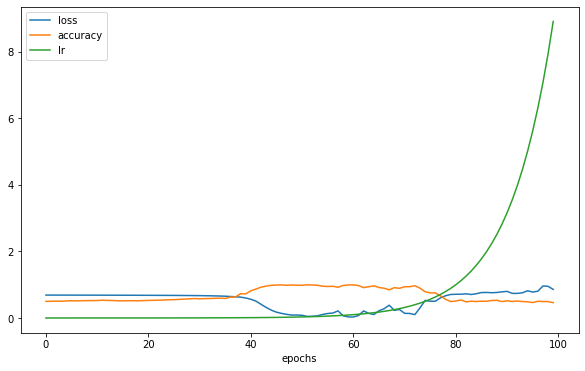

In [ ]:
# check out the history
pd.DataFrame(history_9.history).plot(figsize=(10,6), xlabel="epochs")

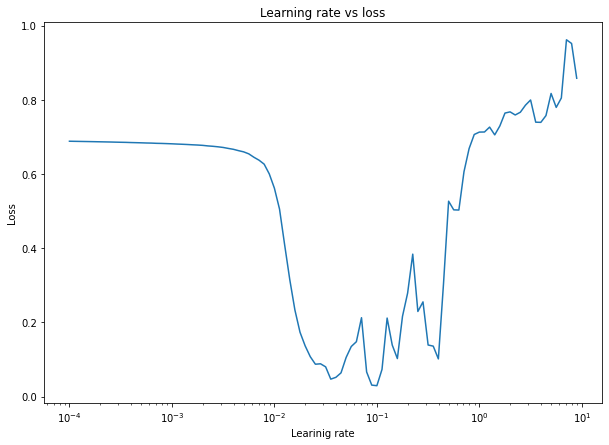

In [ ]:
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history["loss"]) 
#This function is particularly useful when one of the parameters is extremely large and thus 
#stored in a compact manner initially
plt.xlabel("Learinig rate")
plt.ylabel("Loss")
plt.title("Learning rate vs loss")
plt.show()

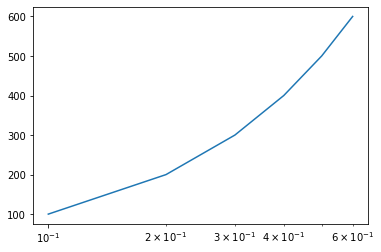

In [ ]:

#import required library
import matplotlib.pyplot as plt
 
# defining the values
# at X and Y axis
x = [0.1, 0.2, 0.3,
     0.4, 0.5, 0.6]
y = [100, 200, 300,
     400, 500, 600]
 
# plotting the given graph
plt.semilogx(x, y)


Ideal learning rate is lowest point on curves

In [ ]:
# let's try using a higher *ideal* learning rate with the same model

tf.random.set_seed(42)
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02),
                metrics=["accuracy"])
history_10 = model_10.fit(x_train,y_train,epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6978 - accuracy: 0.5113
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.5150
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.5025
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.4950
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.5050
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.4412
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4963
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5013
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5025
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5013
Epoch 11/20
25/25 [

In [ ]:
model_10.evaluate(x_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4900


[0.6922222375869751, 0.49000000953674316]

In [ ]:
model_8.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.6739 - accuracy: 0.6050


[0.6738511919975281, 0.6050000190734863]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


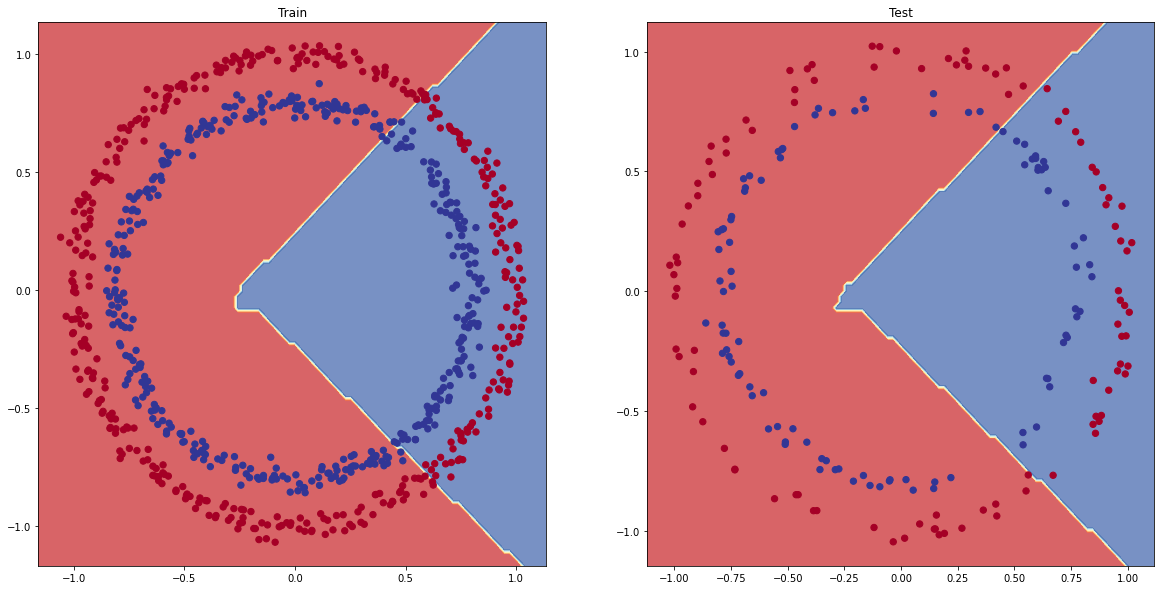

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10,
                       x=x_train,
                       y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10,
                       x=x_test,
                       y=y_test)
plt.show()

## More classification evalutaion methods

Alongside visualizing our models resutls as much as possible, there are a handful of other classification evalutate methods adn metrics you shoul be DataFrame
* Accuracy
* Precision
* Recall
* F1-score
* Confusion Matrix
* Classification report (from scikit-learn)

In [ ]:
# Check the accuracy of tour model
loss, accuracy = model_10.evaluate(x_test, y_test)
print(f"Model loss on the test set:{loss}")
print(f"Model accuracy on the test set: {accuracy* 100:2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.4900
Model loss on the test set:0.6922222375869751
Model accuracy on the test set: 49.000001%


How about confusion matrix?

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make prediction
y_preds= model_10.predict(x_test)

#Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

7/7 [==============================] - 0s 2ms/step


array([[67, 34],
       [68, 31]])

How abou we prettify our confusion matrix?

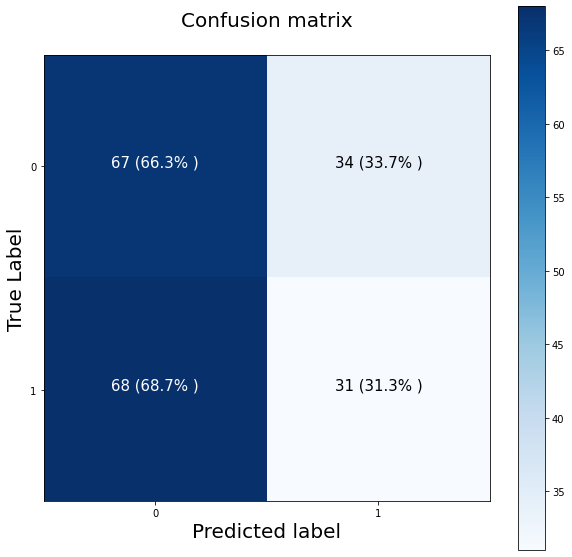

In [ ]:
# Note: teh confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix 
import itertools
figsize=(10,10)
# Create the ocnfusion matrix
cm = confusion_matrix(y_test,tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] #Normalize our confusion matrix
n_classes = cm.shape[0]
fig, ax = plt.subplots(figsize=figsize)

#Create a matrix plot
cax = ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False
if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])
# Lbales the axes
ax.set(title="Confusion matrix",
       xlabel ="Predicted label",
       ylabel ="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels
       )

#Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)
# Set threshold for different colors
threshold =(cm.max()+cm.min())/2

# Plot the text on ecah cell
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}% )",
           horizontalalignment="center",
           color= "white" if cm[i,j] > threshold else "black",
           size=15)

## Working with a larger example ( multiclass classification)

When hyou have more than two classes as an option, it's known as **multi-class classification** 
* This means if you have 3 different classes, it's multicalss classification
* It also means if you have 100 different classes, it's multi-clss classification.

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show the first training example
print(f"Training sample :\n{train_data[0]}")
print(f"Training sample :\n{train_labels[0]}")

Training sample :
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [ ]:
# Check the shape of  a sigle example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

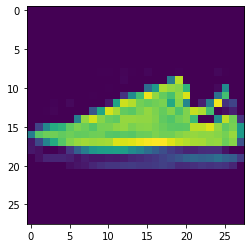

In [ ]:
#Plor a single sample
plt.imshow(train_data[6])

In [ ]:
# Check out samples label
train_labels[6]

7

In [ ]:
# Create a small list so we can index onto our training laels so they're human  readable
class_name= ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [ ]:
class_name[train_labels[6]]

'Sneaker'

In [ ]:
len(class_name)

10

Text(0.5, 1.0, 'T-shirt/Top')

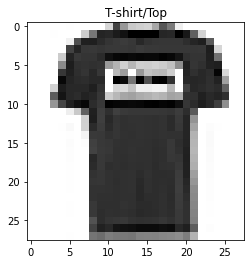

In [ ]:
#Plot an example image and its labels
index=1
plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(class_name[train_labels[index]])

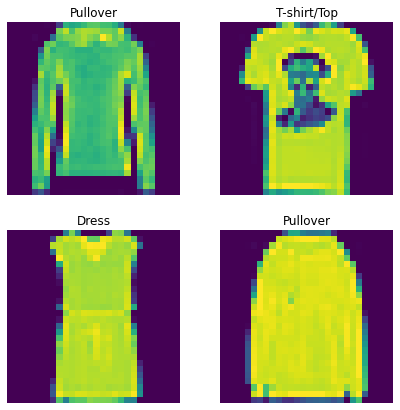

In [ ]:
# Plot multiple random images of fashion images
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index])
  plt.title(class_name[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary calssifiers, howerver, we're going to have to tweak a few things:

* Input shape = 28 * 28 (shape of one image)
* Output shape = 10 (onw per calss of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy
  * if your labels are one_hot encodded use CategoricalCossentroyp()
  * if you labels are integer form use SparseCategoricalCrossentropy
* Output layer activation = Softmax(not sigmoid)


In [ ]:
# Our data needs to be flatten
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [ ]:
tf.random.set_seed(42)
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation =tf.keras.activations.softmax)
])
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
non_norm_history = model_11.fit(train_data,
             tf.one_hot(train_labels, depth=10),
             epochs=10,
             validation_data=(test_data, tf.one_hot(test_labels, depth=10)))


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3503 - accuracy: 0.0977 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [ ]:
model_11.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 4)                 3140      
                                                                 
 dense_27 (Dense)            (None, 4)                 20        
                                                                 
 dense_28 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural netwokrs prefer data to be scaled (or normalized), this means they like have to numbers in the tensor between 0 and 1


In [ ]:
# We can get our training and testing data between 0 and 1 by dividing by the maximum
train_data_norm = train_data/255
test_data_norm =test_data/255

In [ ]:
tf.random.set_seed(42)
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation =tf.keras.activations.softmax)
])
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
norm_history = model_12.fit(train_data_norm,
             train_labels,
             epochs=10,
             validation_data=(test_data_norm,
                              test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3294 - accuracy: 0.4972 - val_loss: 0.8421 - val_accuracy: 0.6929
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7460 - accuracy: 0.7357 - val_loss: 0.7217 - val_accuracy: 0.7464
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6662 - accuracy: 0.7677 - val_loss: 0.6739 - val_accuracy: 0.7640
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6343 - accuracy: 0.7794 - val_loss: 0.6520 - val_accuracy: 0.7769
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6162 - accuracy: 0.7859 - val_loss: 0.6512 - val_accuracy: 0.7713
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6008 - accuracy: 0.7903 - val_loss: 0.6401 - val_accuracy: 0.7786
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5917 - accuracy: 0.7934 - val_loss: 0.6794 - val_accuracy:

:**Note** Neural networks tend to prefer data in numberical form as well as scaled/ normalized( numbers between 0 and 1)

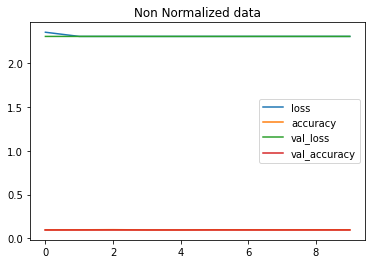

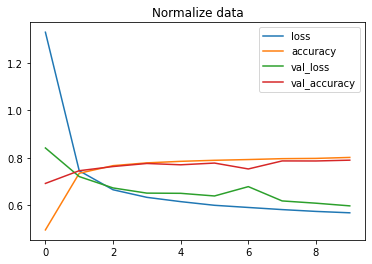

In [ ]:
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(title="Non Normalized data")
pd.DataFrame(norm_history.history).plot(title="Normalize data")

**Note**: The same model with even *slightly*  different data can produce *dramitically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria ( e.g. same architecture but different data or same data but different architecture)

## Finding the ideal learning rate

In [ ]:
# Set random seed
tf.random.set_seed(42)
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])
ls_sheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 **(epoch/20))
find_lr_history=model_13.fit(train_data_norm,
                             train_labels,
                             epochs=40,
                             validation_data=(test_data_norm,test_labels),
                             callbacks=[lr_sheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 2.0347 - accuracy: 0.2242 - val_loss: 1.7867 - val_accuracy: 0.3481 - lr: 1.0000e-04
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5306 - accuracy: 0.4297 - val_loss: 1.2964 - val_accuracy: 0.5327 - lr: 1.1220e-04
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1472 - accuracy: 0.6384 - val_loss: 1.0400 - val_accuracy: 0.6923 - lr: 1.2589e-04
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9165 - accuracy: 0.7143 - val_loss: 0.8515 - val_accuracy: 0.7237 - lr: 1.4125e-04
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7959 - accuracy: 0.7455 - val_loss: 0.7805 - val_accuracy: 0.7511 - lr: 1.5849e-04
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7405 - accuracy: 0.7655 - val_loss: 0.7368 - val_accuracy: 0.7642 - lr: 1.7783e-04
Epoch 7/40
1875/1875 [============

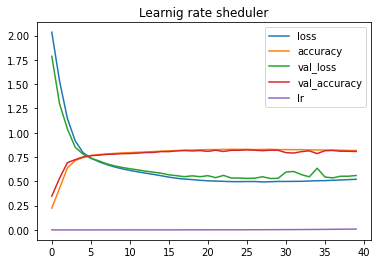

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
pd.DataFrame(find_lr_history.history).plot(title="Learnig rate sheduler")

Text(0.5, 1.0, 'Finding the ideal learning rate')

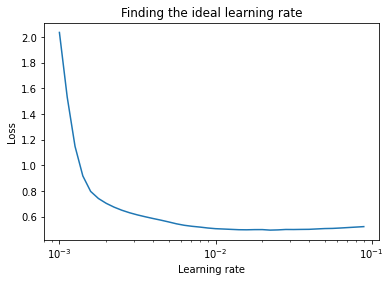

In [ ]:
lrs = 1e-3 * 10 **(tf.range(40)/20)
plt.semilogx(lrs,find_lr_history.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [ ]:
tf.random.set_seed(42)
model_14= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model_14.compile(loss="SparseCategoricalCrossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=['accuracy'])
history_14 = model_14.fit(train_data_norm,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data_norm,
                                        test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3936 - accuracy: 0.4152 - val_loss: 1.0352 - val_accuracy: 0.6184
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8924 - accuracy: 0.6650 - val_loss: 0.8519 - val_accuracy: 0.6784
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7960 - accuracy: 0.7015 - val_loss: 0.7972 - val_accuracy: 0.7046
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7412 - accuracy: 0.7281 - val_loss: 0.7281 - val_accuracy: 0.7422
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6772 - accuracy: 0.7604 - val_loss: 0.6816 - val_accuracy: 0.7589
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6308 - accuracy: 0.7804 - val_loss: 0.6793 - val_accuracy: 0.7692
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6047 - accuracy: 0.7889 - val_loss: 0.6311 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate our multi-class model  we could:
* Evaluate its performance using othe classicaication metrics( such as a confusion matrix)
* Improve its resluts (by trianing it for laonger or changeing the architecture)
* Save and export it for use in an application
let's go to through the top 2..

In [ ]:
# Note: teh confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix 
import itertools
from sklearn.metrics import confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), textsize=15):
    # Create the ocnfusion matrix
    cm = confusion_matrix(y_true,y_pred=y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] #Normalize our confusion matrix
    n_classes = cm.shape[0]
    fig, ax = plt.subplots(figsize=figsize)

    #Create a matrix plot
    cax = ax.matshow(cm,cmap=plt.cm.Blues)
    fig.colorbar(cax)
    if classes:
      labels = classes
    else:
      labels = np.arange(cm.shape[0])
    # Lbales the axes
    ax.set(title="Confusion matrix",
          xlabel ="Predicted label",
          ylabel ="True Label",
          xticks=np.arange(n_classes),
          yticks=np.arange(n_classes),
          xticklabels = labels,
          yticklabels = labels
          )

    #Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(textsize)
    ax.xaxis.label.set_size(textsize)
    ax.title.set_size(textsize)
    # Set threshold for different colors
    threshold =(cm.max()+cm.min())/2

    # Plot the text on ecah cell
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}% )",
              horizontalalignment="center",
              color= "white" if cm[i,j] > threshold else "black",
              size=textsize) 

In [ ]:
class_name

['T-shirt/Top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# Make some predictions with our model
y_probs =model_14.predict(test_data_norm)

# Viw the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[9.37110861e-04, 1.96876499e-04, 8.02375598e-06, 8.71120355e-05,
        5.36760263e-06, 2.12013230e-01, 2.08123165e-05, 2.74012536e-01,
        2.69372365e-03, 5.10025144e-01],
       [2.52272275e-05, 3.11282169e-14, 7.37224817e-01, 5.01546128e-06,
        7.16408640e-02, 4.28882601e-08, 1.90999299e-01, 3.17874948e-21,
        1.04739695e-04, 3.24841951e-25],
       [2.24322594e-06, 9.97715175e-01, 3.04928305e-10, 2.28255033e-03,
        5.95488210e-08, 1.52470199e-17, 7.09469505e-09, 9.82206469e-11,
        1.56175455e-11, 3.74054466e-21],
       [2.76264274e-07, 9.99069452e-01, 2.40079779e-11, 9.30324721e-04,
        1.06607470e-08, 2.05895801e-19, 5.97745520e-10, 7.73180825e-12,
        8.26122699e-13, 1.65867519e-23],
       [2.14152664e-01, 4.15234990e-06, 2.08842397e-01, 7.32326228e-03,
        1.41097000e-02, 6.12721487e-04, 5.44990480e-01, 1.15089442e-07,
        9.96448658e-03, 2.46973233e-08]], dtype=float32)

**Note:** Remember to make predictions on the same kind of data your model was trainedon(e.g if your normalized data, you'll want to make predictions on normalized data)

In [ ]:
y_probs[0]

array([9.3711086e-04, 1.9687650e-04, 8.0237560e-06, 8.7112036e-05,
       5.3676026e-06, 2.1201323e-01, 2.0812317e-05, 2.7401254e-01,
       2.6937237e-03, 5.1002514e-01], dtype=float32)

In [ ]:
tf.argmax(y_probs[0]), class_name[tf.argmax(y_probs[0])]

(<tf.Tensor: shape=(), dtype=int64, numpy=9>, 'Ankle boot')

In [ ]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
confusion_matrix(y_true=test_labels, y_pred=y_preds)

array([[761,   4,  20,  98,   4,   2,  93,   0,  18,   0],
       [ 13, 928,   1,  54,   1,   0,   1,   0,   2,   0],
       [ 27,   0, 614,  21, 189,   0, 144,   0,   5,   0],
       [ 49,  11,   8, 834,  33,   1,  55,   0,   9,   0],
       [  1,   0,  85,  58, 752,   2,  99,   0,   3,   0],
       [  3,   0,   0,   0,   0, 923,   0,  46,  10,  18],
       [156,   0,  85,  79, 131,   0, 510,   0,  37,   2],
       [  0,   0,   0,   0,   0,  54,   0, 925,   1,  20],
       [  8,   0,   1,   6,   4,  11,  41,   3, 923,   3],
       [  2,   0,   0,   0,   0,  25,   0,  53,   4, 916]])

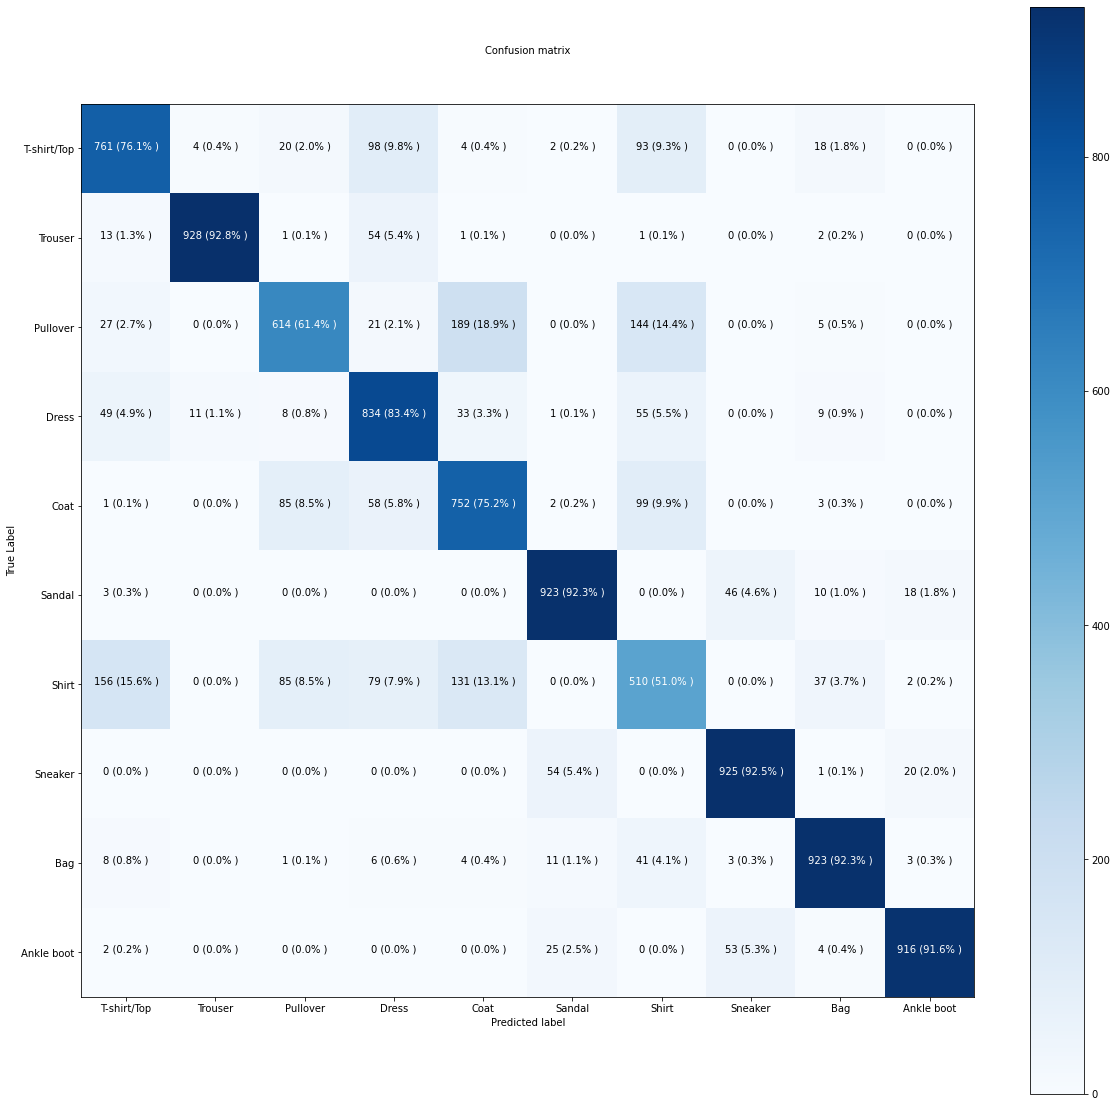

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_name,
                      figsize=(20,20),
                      textsize=10
                      )

**Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possibleot develope a further understanding of the data and the inputs and outputs o fyour models

How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label and the predicted label


In [ ]:
import random
def plot_random_image(model, images, true_labels, classes):
  """
  
  """
  i = random.randint(0, len(images))
  target_images= images[i]
  pred_probs = model.predict(target_images.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]
  plt.imshow(target_images, cmap=plt.cm.binary)

  if pred_label == true_label:
    color ="green"
  else:
    color = "red"
  plt.xlabel("Pred:{} {:2.0f}% (True: {})".format(pred_label, 100* tf.reduce_max(pred_probs),
                                               true_label),
             color=color
              )

1/1 [==============================] - 0s 48ms/step


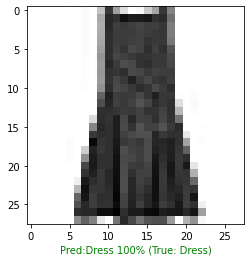

In [ ]:
plot_random_image(model=model_14,
                  images= test_data,
                  true_labels = test_labels,
                  classes= class_name
                  )

## What patterns is our model learning?

In [ ]:
# Find the layers of our most recent model
model_14.layers

In [ ]:
# Extract a particular layer
model_14.layers[1]

In [ ]:
#Get the patterns of layer in our network
weights, biases = model_14.layers[1].get_weights()
weights, weights.shape

(array([[-0.1572552 , -0.06336886,  0.7389276 , -0.2985669 ],
        [-0.24690597,  0.25729012,  0.59197056, -0.37160942],
        [ 0.16058987, -0.4065797 ,  0.57940996, -0.85022676],
        ...,
        [ 0.12436906,  0.23319232,  0.20926014, -0.28624737],
        [ 0.02911809,  0.02903139, -0.10866062, -0.01122421],
        [-0.13806695, -0.4783175 ,  0.3977731 , -0.14635383]],
       dtype=float32), (784, 4))

In [ ]:
biases, biases.shape

(array([1.6103206, 3.7501884, 1.9605751, 2.567628 ], dtype=float32), (4,))

Every neuron has a bias vector. Each of thers is paired with a weights matrix.
The bias vector get initalized as zeros (at least in the case of a Tensorflow)
The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

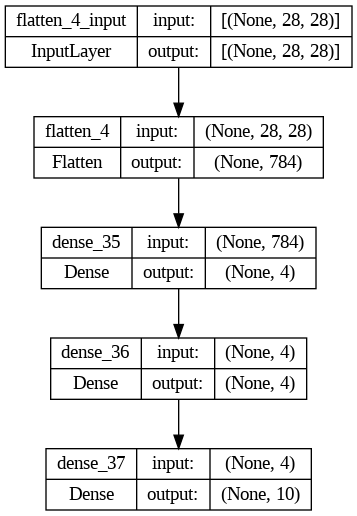

In [ ]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
plot_model(model_14,show_shapes=True)